**César Antonio Hoyos Peláez**-
**1007328843**

**Tarea #7**

In [17]:
#@title Laboratorio 7
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
import seaborn as sns

The iris dataset fue usado por R. A. Fisher en su clásico paper de 1936 "The use of Multiple measurements in taxonomic problems".

### Punto #1: Importar iris dataset

In [18]:
data = load_iris() # Se llama el dataset de la libreria sklearn
df = pd.DataFrame(data=data.data, columns=data.feature_names) # Se convierte en un dataframe
df['species'] = data.target # Se añade al dataframe la clasificacion de cada planta

### Punto #2. Generar una intuición respecto a iris dataset. Ver laboratorio anterior.

In [19]:
df.head() # Se muestran las 5 primeras filas

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Para generar intuición estadística sobre el dataFrame, primero generamos un filtro en el dataFrame para que dependiendo de la especie nos de el valor medio de longitud y ancho en las variables "sepal" y "petal".

In [20]:
df1 = df[df['species'] == 0]
df2 = df[df['species'] == 1]
df3 = df[df['species'] == 2]

In [21]:
df1.mean()

sepal length (cm)    5.006
sepal width (cm)     3.428
petal length (cm)    1.462
petal width (cm)     0.246
species              0.000
dtype: float64

In [22]:
df2.mean()

sepal length (cm)    5.936
sepal width (cm)     2.770
petal length (cm)    4.260
petal width (cm)     1.326
species              1.000
dtype: float64

In [23]:
df3.mean()

sepal length (cm)    6.588
sepal width (cm)     2.974
petal length (cm)    5.552
petal width (cm)     2.026
species              2.000
dtype: float64

Si una tratara de obtener información para clasificar las especies con respecto al valor medio de cada variable. Se hace un proceso dificil entre las 4 diferentes características. Pero se puede inferir:

1. La especie 2 tiene mayor valor medio en sepal length, petal length y petal width.  Por tanto, de manera poco rigurosa se podría inferir que consiste a la flor más grande.

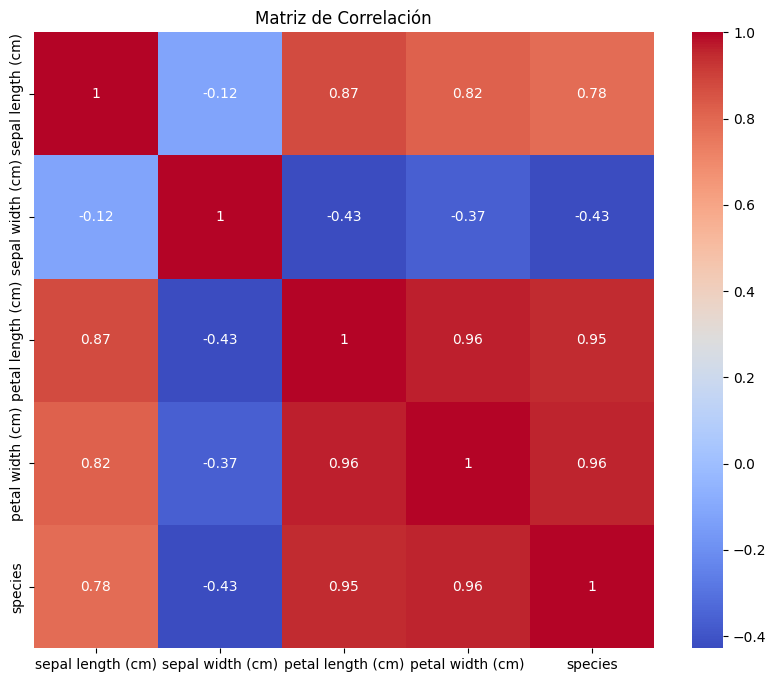

In [24]:
MatrizCorr = df.corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(MatrizCorr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

Adicionalmente, se evidencia que un gráfico que represente la correlación entre las variables brinda alguna información interesante. Por ejemplo:

1. Las variables petal width y petal length están fuertemente correlacionadas. Lo cuál se evidencia en cada uno de los valores medios para las especies. Ya que, a menor petal width también menor petal length, y viceversa en el caso de que haya incremento.

El problema de inferir información de esta forma es que se hace un proceso costoso en términos de tiempo. Aunque se podría clasificar la información de las especies teniendo en cuenta gráficos de dispersión, matriz de correlación y valor medio en cada variable para un dataframe con muchas más variables sería un proceso casi imposible

## Punto #3. Dividir el *dataset* empleanto el metodo train_test_split de sklearn

En esta parte se divide el dataset en dos partes:

1. Unos datos que van a ser útiles para el entrenamiento.
2. Unos datos que van a ser útiles para validar el algoritmo entrenado y con esto verificar que tan útil es.

Para esto se importa **sklearn.model_selection.train_test_split**. Algunos parámetros importantes son:

* test_size: se puede elegir un valor entre 0 y 1, representa la porción del dataset que será incluido en el los datos de test.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

## Punto #4.  Dentro de sklearn, aplicar el algoritmo DecisionTreeClassifier.

El método de **Decision Tree** es un método de aprendizaje supervisado usado para la clasificación y regresión. La idea de implementar este es crear un modelo que predice los valores de target por un aprendizaje simple basado en unas reglas que se infieren a partir de las características de los datos.

Algunas de las ventajas que posee este método son:

1. Simple de entender y interpretar, además permite visualizar.
2. No requiere gran cantidad de datos para ser implementado.
3. El costo de usar este algoritmo es log(n) donde n representa los datos que se están entrenando. Por lo que se considera un algoritmo eficiente.

Algunas de sus principales desventajas son:

1. Este algoritmo puede crear árboles muy complejos que no generalizan bien los datos. Esto se conoce como llamar overfitting.
2. Es un algoritmo sensible, es decir, cuando se tienen datos con pequeñas variaciones, puede crear árboles totalmente diferentes para datos similares.

Para mayor información veáse el siguiente link:
https://scikit-learn.org/stable/modules/tree.html#tree

In [26]:
clf = DecisionTreeClassifier() # Se implementa el método
clf.fit(X_train, y_train) # Se hace un fit con los datos de entrenamiento

score = clf.score(X_test, y_test) # Se toma el score de los datos
print(f"La precisión del modelo es: {score}")

La precisión del modelo es: 1.0


## Punto #5. Para el clasificador analice el gráfico de desición:

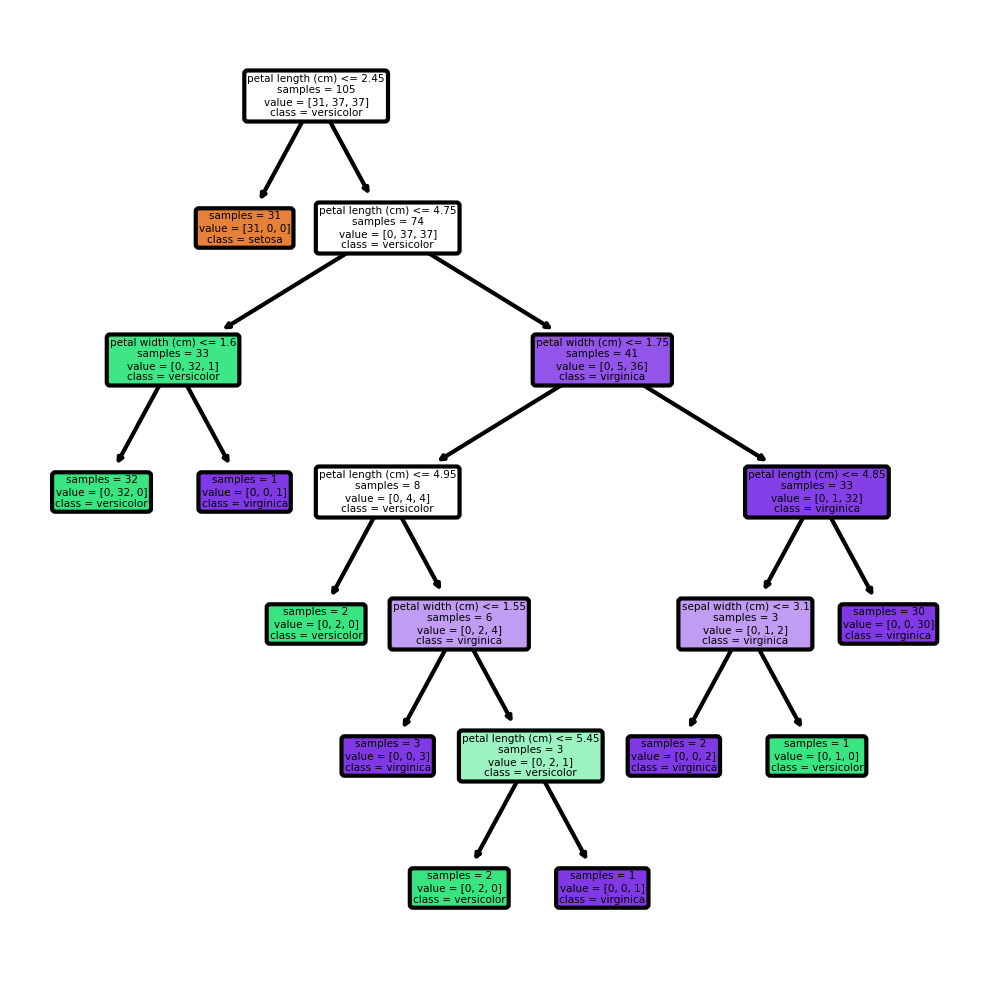

In [27]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (4,4), dpi=300)
graph = tree.plot_tree(clf,class_names = data.target_names,\
  feature_names = data.feature_names,\
  impurity=False, filled=True,rounded=True )

El paso a paso que utiliza el desiciontree es el siguiente:
1. Primero toma 105 muestras de los datos de entrenamiento. Evalúa para $petal_{width} \leq 0.8$ con esto determina que 31 datos determinan a la clase **setosa** pero no es capaz de inferir información de las clases **versicolor** y **virginica**. Por esto, el resto de la creación del árbol se enfoca en clasificar versicolor y virginica.

2. Luego, toma la operación $petal_{length} \leq 4.75$ para las restas muestras. Con base en esta operación, se observa que para valores menores a 4.75 tiene 32 datos correspondiente a la clase versicolor, pero le queda un dato de la clase virginica. Para valores mayores a 4.75, obtiene 36 datos correspondientes a la clase virgina pero tiene 5 datos de la clase versicolor. Debido a que el algoritmo no clasifica con gran exactitud en la rama dos sigue extendiendosé para ser más complejo.

3. Para los datos menores a 4.75 realiza una nueva clasificación. En donde, para datos menores a 1.6 los clasifica en la clase versicolor, y datos mayores en la clase virgina. Hasta este punto, en teoría el método sería capaz de clasificar cualquier planta que ingrese y cumpla estas clasificaciones.

4. Para los datos mayores a 4.75 se realiza una nueva clasificación. En esta se propone que para datos menores a 1.75 en el petal width encuentra 4 de versicolor y 4 de virginica. Y para datos mayores, encuentra 1 dato de versicolor y 32 de virginica.

El árbol sigue desprendiendosé de esta manera hasta ser capaz de clasificar todos los datos.


## Punto #6. Características importantes:

En el siguiente gráfico se presenta cual es la característica más importante para el algoritmo. Con base a esto, se decide que con el petal width es con el que hace la mayoría de clasificaciones. Si se observa el árbol en la imagen anterior se observa que utilizó 5 veces la clasificación del tamaño del petalo para llegar al resultado. También se hizo uso de la longitud del petálo 4 veces, pero al parecer este característica no da una buena clasificación.

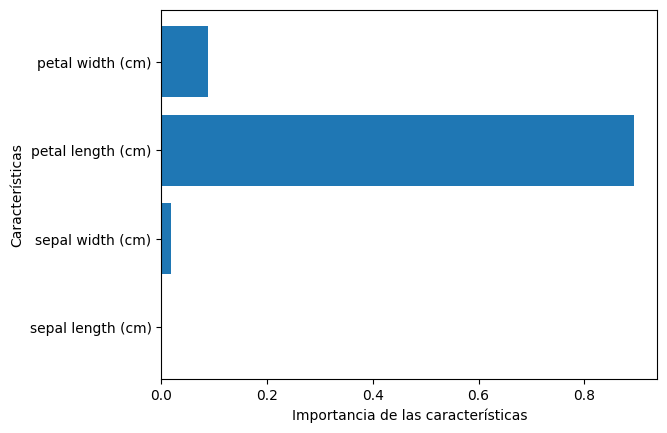

In [28]:
clf.feature_importances_
caract = data.data.shape[1]
plt.barh(range(caract), clf.feature_importances_)
plt.yticks(np.arange(caract),data.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()

## Punto #7. Fronteras de decisión

<ipython-input-29-53a90e0f9578>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-29-53a90e0f9578>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-29-53a90e0f9578>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-29-53a90e0f9578>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-29-53a90e0f9578>:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipyt

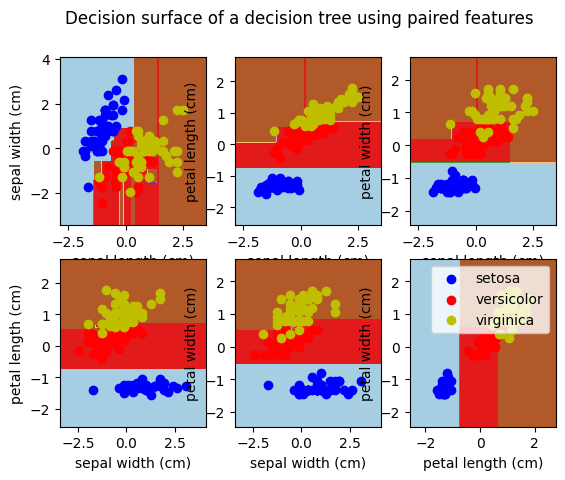

In [29]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

En este gráfico se presenta la gráfica de las fronteras que toma el árbol de decisión.